In [1]:
import ROOT
from array import array
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu_chain = ROOT.TChain("mu");
pi_chain = ROOT.TChain("pi");
mu_chain.Add("allmom.root/Mu");
pi_chain.Add("allmom.root/Pi");

In [3]:
lpmuid = array( 'f' , [0] );
lmmuid = array( 'f' , [0] );
lpmom = array( 'f' , [0] );
lmmom = array( 'f' , [0] );

mu_chain.SetBranchAddress("Lpmuid", lpmuid);
mu_chain.SetBranchAddress("Lmmuid", lmmuid);
mu_chain.SetBranchAddress("Lpmom", lpmom);
mu_chain.SetBranchAddress("Lmmom", lmmom);
pi_chain.SetBranchAddress("Lpmuid", lpmuid);
pi_chain.SetBranchAddress("Lmmuid", lmmuid);
pi_chain.SetBranchAddress("Lpmom", lpmom);
pi_chain.SetBranchAddress("Lmmom", lmmom);

In [4]:
for k in range(11):
    
    mu_tot = 0.0
    mup_sel = 0.0
    mum_sel = 0.0
    pi_tot = 0.0
    pip_sel = 0.0
    pim_sel = 0.0
    
    for i in range(mu_chain.GetEntries()):
        mu_chain.GetEntry(i);
        mu_tot += 1
        if lpmuid[0] >= (0.1*k):
            mup_sel += 1
        if lmmuid[0] >= (0.1*k):
            mum_sel += 1

    for i in range(pi_chain.GetEntries()):
        pi_chain.GetEntry(i);
        pi_tot += 1
        if lpmuid[0] >= (0.1*k):
            pip_sel += 1
        if lmmuid[0] >= (0.1*k):
            pim_sel += 1
            
    print 0.1*k
    print (mup_sel+mum_sel)/(2*mu_tot)
    print (pip_sel+pim_sel)/(2*pi_tot)

0.0
1.0
1.0
0.1
0.597020824052
0.0424756745617
0.2
0.595224408261
0.0374633830392
0.3
0.593277093543
0.0340703340056
0.4
0.591387264131
0.0311115363667
0.5
0.589253122171
0.028829876496
0.6
0.585911788799
0.0260992448442
0.7
0.581772846816
0.0233686131924
0.8
0.574508141356
0.020431896133
0.9
0.561099693891
0.01567721137
1.0
0.0
0.0


In [5]:
mom_bins = np.arange(0.0, 5.3, 0.2)

mu_tot = np.zeros(26);
mu_sel = np.zeros(26);
mu_eff = np.zeros(26);

pi_tot = np.zeros(26);
pi_sel = np.zeros(26);
pi_fake = np.zeros(26);

for j in range(26):
    
    for i in range(mu_chain.GetEntries()):
        mu_chain.GetEntry(i);
        if(lpmom[0] >= mom_bins[j] and lpmom < mom_bins[j+1]):
            mu_tot[j] += 1
            if lpmuid[0] >= 0.9:
                mu_sel[j] += 1
        if(lmmom[0] >= mom_bins[j] and lmmom < mom_bins[j+1]):
            mu_tot[j]+= 1
            if lmmuid[0] >= 0.9:
                mu_sel[j] += 1
        
    mu_eff[j] = (mu_sel[j]/mu_tot[j])*100
    
    for i in range(pi_chain.GetEntries()):
        pi_chain.GetEntry(i);
        if(lpmom[0] >= mom_bins[j] and lpmom < mom_bins[j+1]):
            pi_tot[j] += 1
            if lpmuid[0] >= 0.9:
                pi_sel[j]+= 1
        if(lmmom[0] >= mom_bins[j] and lmmom < mom_bins[j+1]):
            pi_tot[j] += 1
            if lmmuid[0] >= 0.9:
                pi_sel[j] += 1
        
    pi_fake[j] = (pi_sel[j]/pi_tot[j])*100

In [6]:
def binP(N, p, x1, x2):
    p = float(p)
    q = p/(1-p)
    k = 0.0
    v = 1.0
    s = 0.0
    tot = 0.0

    while(k<=N):
            tot += v
            if(k >= x1 and k <= x2):
                    s += v
            if(tot > 10**30):
                    s = s/10**30
                    tot = tot/10**30
                    v = v/10**30
            k += 1
            v = v*q*(N+1-k)/k
    return s/tot

def calcBin(vx, vN, vCL = 95):
    '''
    Calculate the exact confidence interval for a binomial proportion

    Usage:
    >>> calcBin(13,100)    
    (0.07107391357421874, 0.21204372406005856)
    >>> calcBin(4,7)   
    (0.18405151367187494, 0.9010086059570312)
    ''' 
    vx = float(vx)
    vN = float(vN)
    #Set the confidence bounds
    vTU = (100 - float(vCL))/2
    vTL = vTU

    vP = vx/vN
    if(vx==0):
            dl = 0.0
    else:
            v = vP/2
            vsL = 0
            vsH = vP
            p = vTL/100

            while((vsH-vsL) > 10**-5):
                    if(binP(vN, v, vx, vN) > p):
                            vsH = v
                            v = (vsL+v)/2
                    else:
                            vsL = v
                            v = (v+vsH)/2
            dl = v

    if(vx==vN):
            ul = 1.0
    else:
            v = (1+vP)/2
            vsL =vP
            vsH = 1
            p = vTU/100
            while((vsH-vsL) > 10**-5):
                    if(binP(vN, v, 0, vx) < p):
                            vsH = v
                            v = (vsL+v)/2
                    else:
                            vsL = v
                            v = (v+vsH)/2
            ul = v
    return (dl, ul)

In [7]:
mu_eff_ll = np.zeros(26);
mu_eff_ul = np.zeros(26);
pi_fake_ll = np.zeros(26);
pi_fake_ul = np.zeros(26);

for m in range(26):
    (mu_eff_ll[m], mu_eff_ul[m]) = calcBin(mu_sel[m],mu_tot[m])
    (pi_fake_ll[m], pi_fake_ul[m]) = calcBin(pi_sel[m],pi_tot[m])
    
mu_eff_ll = mu_eff_ll*100;
mu_eff_ul = mu_eff_ul*100;
pi_fake_ll = pi_fake_ll*100;
pi_fake_ul = pi_fake_ul*100;

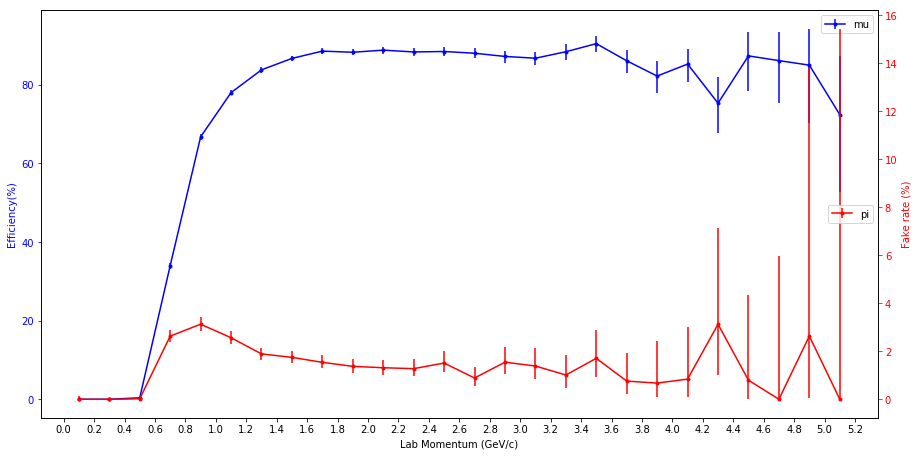

In [12]:
mom_plot = np.arange(0.1, 5.3, 0.2)

fig, ax1 = plt.subplots(figsize=(15, 7.5))
ax1.errorbar(mom_plot, mu_eff, yerr=[mu_eff-mu_eff_ll, mu_eff_ul-mu_eff], fmt='b.-',label='mu')
ax1.set_xlabel('Lab Momentum (GeV/c)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Efficiency(%)' , color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(np.arange(0.0, 5.7, 0.2))
ax1.legend()

ax2 = ax1.twinx()
ax2.errorbar(mom_plot, pi_fake, yerr=[pi_fake-pi_fake_ll, pi_fake_ul-pi_fake], fmt='r.-',label='pi')
ax2.set_ylabel('Fake rate (%)', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc=5)

fig.savefig("overall.pdf")